In [544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [545]:
wine = pd.read_csv('/Users/reethusajjarao/Desktop/INTRO TO ML/datasets/winequality-red.csv').dropna()
wine.head()
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [546]:
X = wine.iloc[:, :-10].values   
y = wine.iloc[:, -10].values  


In [547]:
wtra_ratio = 0.8
w_sample = len(wine)
w_train = int(wtra_ratio * w_sample)

X_train = X[:w_train]
y_train = y[:w_train]
X_test = X[w_train:]
y_test = y[w_train:]

In [548]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ w
mse = np.mean((y_test - y_pred) ** 2)
print(f'MSE: {mse}')
print(f'weight: {w}')

MSE: 0.015505513350040656
weight: [-0.02608071  0.06383861 -0.44734323]


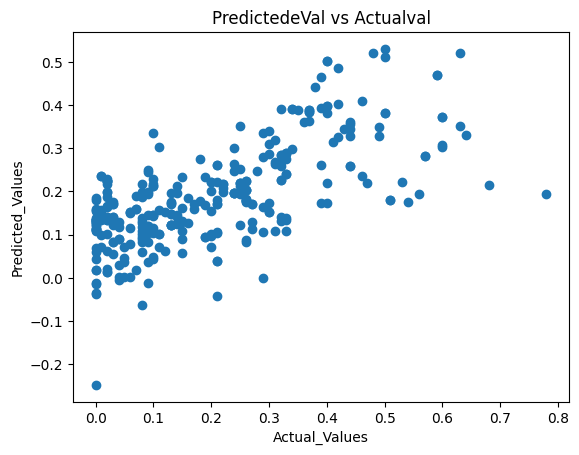

In [549]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual_Values')
plt.ylabel('Predicted_Values')
plt.title('PredictedeVal vs Actualval')
plt.show()


In [550]:
pen_d = pd.read_csv('/Users/reethusajjarao/Desktop/INTRO TO ML/datasets/penguins.csv').dropna()
pen_d.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [551]:
cat = ['species', 'island', 'sex']
map_lab = {}
for column in cat:
    cat1 = pen_d[column].unique()
    map_lab[column] = {category: index for index, category in enumerate(cat1)}
    pen_d[column] = pen_d[column].map(map_lab[column])
print(pen_d)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0          0       0            39.1           18.7              181.0  \
1          0       0            39.5           17.4              186.0   
2          0       0            40.3           18.0              195.0   
4          0       0            36.7           19.3              193.0   
5          0       0            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
339        2       2            55.8           19.8              207.0   
340        2       2            43.5           18.1              202.0   
341        2       2            49.6           18.2              193.0   
342        2       2            50.8           19.0              210.0   
343        2       2            50.2           18.7              198.0   

     body_mass_g  sex  year  
0         3750.0    0  2007  
1         3800.0    1  2007  
2         3250.0    1

In [552]:
numcol = ['species','island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

def standardize(column):
    return (column - column.mean()) / column.std()
for column in numcol:
    pen_d[column] = standardize(pen_d[column])

pen_d.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,-0.997325,-1.811311,-0.894695,0.779559,-1.424608,-0.567621,0,2007
1,-0.997325,-1.811311,-0.821552,0.119404,-1.067867,-0.505525,1,2007
2,-0.997325,-1.811311,-0.675264,0.424091,-0.425733,-1.188572,1,2007
4,-0.997325,-1.811311,-1.333559,1.084246,-0.568429,-0.940192,1,2007
5,-0.997325,-1.811311,-0.858123,1.744400,-0.782474,-0.691811,0,2007


In [553]:
P_feat = ['species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
P_target = 'sex'
X = pen_d[P_feat]
y = pen_d[P_target]

In [554]:

T_len = int(0.8 * len(pen_d))
X_train, X_test = X[:T_len], X[T_len:]
y_train, y_test = y[:T_len], y[T_len:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 5)
(67, 5)
(266,)
(67,)


In [555]:
import numpy as np

class LogisticRegression:
    def __init__(self, LR=0.001, Iter=1000):
        self.LR = LR
        self.Iter = Iter
        self.loss = []

    def sigmoid(self, j):
        return 1 / (1 + np.exp(-j))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for _ in range(self.Iter):
            j = np.dot(X, self.theta)
            k = self.sigmoid(j)
            P_grad = np.dot(X.T, (k - y)) / m
            self.theta -= self.LR * P_grad
            price = (-y * np.log(k) - (1 - y) * np.log(1 - k)).mean()
            self.loss.append(price)

    def predict(self, X):
        print(self.theta)
        r1 = np.dot(X, self.theta)
        th = self.sigmoid(r1)
        return (th >= 0.5).astype(int)


In [556]:
type = LogisticRegression(LR=0.001, Iter=1000)
type.fit(X, y)
predictions = type.predict(X)
accuracy = (predictions == y).mean()
print(f'Accuracy: {accuracy}')



[ 0.01652084 -0.13778204 -0.18547162 -0.09604656 -0.17805487]
Accuracy: 0.8228228228228228


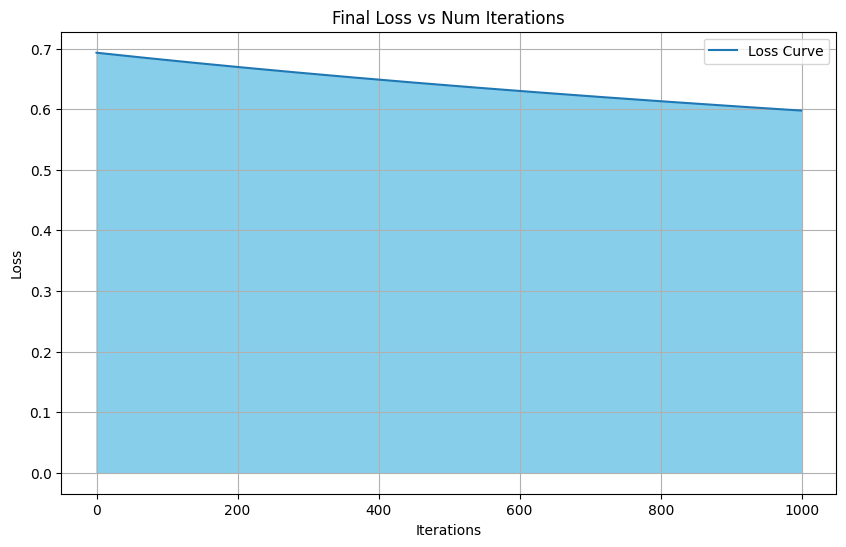

In [557]:


loss = type.loss

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss)), loss, label='Loss Curve')
plt.fill_between(range(len(loss)), loss, color='skyblue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Final Loss vs Num Iterations')
plt.legend()
plt.grid(True)
plt.show()


In [558]:
type = LogisticRegression(LR=0.001, Iter=5000)
type.fit(X, y)
predictions = type.predict(X)
accuracy = (predictions == y).mean()
print(f'Accuracy: {accuracy}')

[ 0.18130889 -0.40989412 -0.78562838 -0.2419537  -0.59259162]
Accuracy: 0.8978978978978979


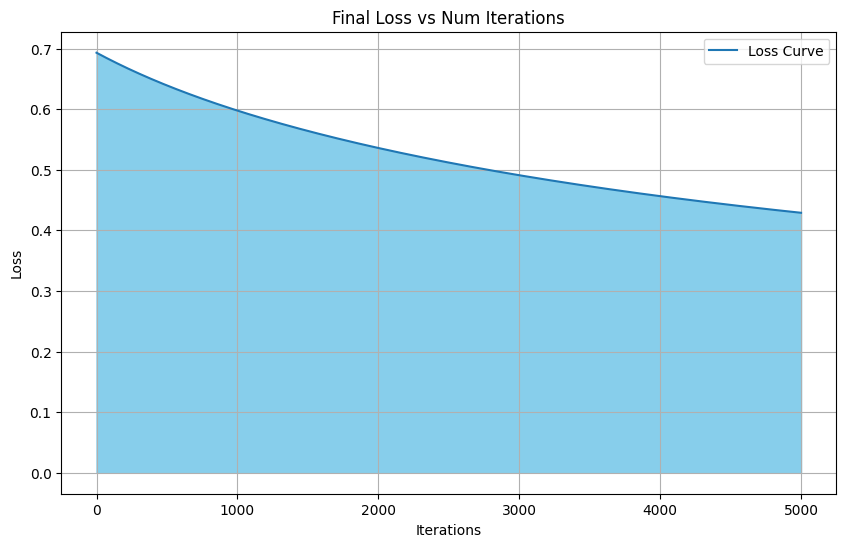

In [559]:
loss = type.loss

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss)), loss, label='Loss Curve')
plt.fill_between(range(len(loss)), loss, color='skyblue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Final Loss vs Num Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [560]:
type = LogisticRegression(LR=0.0001, Iter=5000)
type.fit(X, y)
predictions = type.predict(X)
accuracy = (predictions == y).mean()
print(f'Accuracy: {accuracy}')

[ 0.00443618 -0.07643509 -0.09331654 -0.05490368 -0.09663703]
Accuracy: 0.7807807807807807


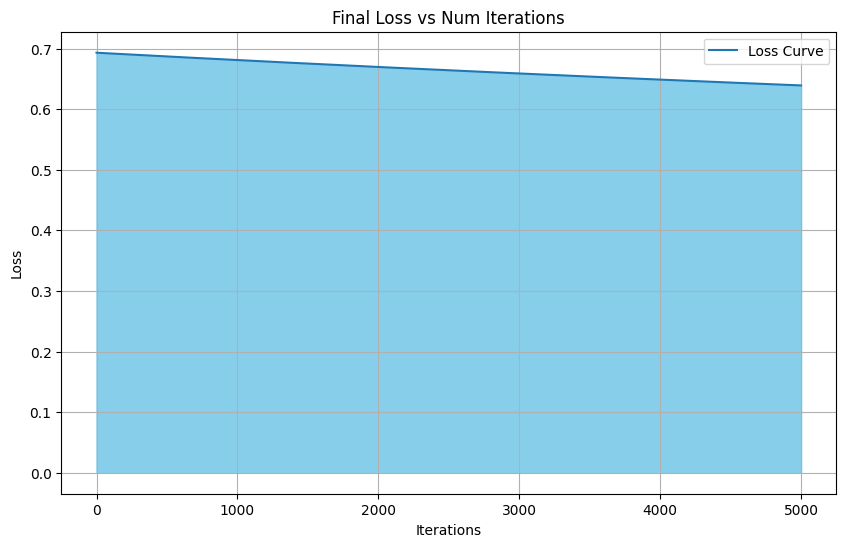

In [561]:
loss = type.loss

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss)), loss, label='Loss Curve')
plt.fill_between(range(len(loss)), loss, color='skyblue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Final Loss vs Num Iterations')
plt.legend()
plt.grid(True)
plt.show()